In [20]:
from set_math import *

In [21]:
from set_visualization import *

# load and merge data

In [22]:
train = pd.read_csv("../../data/basic/train.csv")
key = pd.read_csv("../../data/basic/key.csv")
weather1 = pd.read_csv("../../data/weather_v8_with_holiday.csv", index_col = 0)

In [23]:
df = pd.merge(train, key)

In [24]:
df1 = pd.merge(df, weather1)
df1 = pd.DataFrame(data=df1, columns=['date', 'units','store_nbr','item_nbr', 'station_nbr', 
                                      'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 
                                      'sunrise', 'sunset', 'snowfall', 'preciptotal',
                                      'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 
                                      'codesum', 'codesum_YN', 'dayofweek', 'is_holiday'])
print(df1.shape)
print(df1.columns)
df1.head()

(4617600, 26)
Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'],
      dtype='object')


,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,0,1,1,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
1,2012-01-01,0,1,2,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
2,2012-01-01,0,1,3,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
3,2012-01-01,0,1,4,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
4,2012-01-01,0,1,5,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday


# 단 한번도 팔리지 않은 item_nbr 가 있는지 확인.

In [25]:
df_test = df1

In [26]:
table = pd.pivot_table(df_test, values = ['units'], index=['store_nbr'], columns=['item_nbr'], aggfunc=np.sum)

In [27]:
table = table['units']

In [28]:
sold_item = []
for j in range(1, 45+1):
    for i in range(1, 111+1):
        if table[i].loc[j] != 0:
            sold_item.append(i)

print(sold_item)

[9, 28, 40, 47, 51, 89, 93, 99, 5, 11, 44, 85, 93, 2, 5, 45, 93, 102, 109, 9, 27, 90, 93, 96, 97, 101, 16, 20, 32, 37, 93, 105, 9, 14, 45, 107, 5, 7, 23, 93, 95, 5, 23, 59, 84, 93, 100, 5, 10, 42, 45, 93, 105, 5, 21, 37, 86, 93, 9, 61, 68, 86, 87, 110, 16, 37, 79, 86, 93, 5, 36, 46, 93, 104, 9, 15, 25, 33, 50, 70, 88, 93, 5, 15, 17, 45, 49, 61, 86, 93, 16, 25, 39, 50, 64, 77, 85, 93, 9, 37, 48, 71, 5, 37, 57, 72, 15, 16, 39, 69, 75, 83, 88, 93, 5, 18, 41, 74, 93, 106, 5, 44, 91, 109, 9, 54, 68, 78, 93, 104, 5, 29, 45, 56, 6, 43, 60, 76, 97, 9, 12, 45, 50, 81, 84, 93, 2, 5, 45, 9, 21, 68, 80, 93, 2, 5, 35, 45, 8, 41, 45, 56, 13, 16, 44, 49, 51, 65, 9, 45, 67, 93, 98, 104, 9, 19, 45, 51, 58, 86, 93, 9, 44, 85, 92, 93, 9, 31, 45, 52, 84, 93, 16, 24, 49, 50, 63, 66, 93, 105, 1, 9, 30, 44, 5, 15, 38, 45, 53, 104, 105, 9, 45, 52, 86, 93, 98, 9, 36, 103, 111, 5, 15, 45, 51, 55, 93, 106, 16, 61, 68, 86, 93, 108, 5, 45, 82, 3, 16, 37, 73, 93, 105, 5, 62, 68, 93, 94, 105, 4, 9, 22, 26, 34, 50]


In [29]:
not_sold=[]
for num in range(1, 111+1):
    if num not in sold_item == True:
        not_sold.append(num)
        
print(not_sold)

[]


### 단 한번도 팔리지 않은 아이템은 없다

# units이 0이면 제외

In [30]:
df_test = df_test[df_test["units"] > 0].reset_index(drop=True)
print(df_test.shape)
df_test.head()

(118696, 26)


,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,29,1,9,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
1,2012-01-01,2,1,28,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
2,2012-01-01,1,1,51,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
3,2012-01-02,60,1,9,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work
4,2012-01-02,5,1,28,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work


# Trial 0 : units=0을 제외한 모든 데이터 & 모든 독립변수

- 실수형 : 모든 실수형 피쳐
- 카테고리형 : item_nbr, store_nbr

In [31]:
model_1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + codesum_YN + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + C(item_nbr) + C(store_nbr) + codesum_YN + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:17:14   Log-Likelihood:            -5.7568e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118521   BIC:                         1.153e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(item_nbr)[1]      

# 1. Correlation & VIF

### 실수형 독립변수 corrleation

In [32]:
df_test.columns

Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [33]:
dfX1 = df_test[['units', 'tmax', 'tmin',
               'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise','sunset',
               'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
               'resultspeed', 'resultdir', 'avgspeed']]

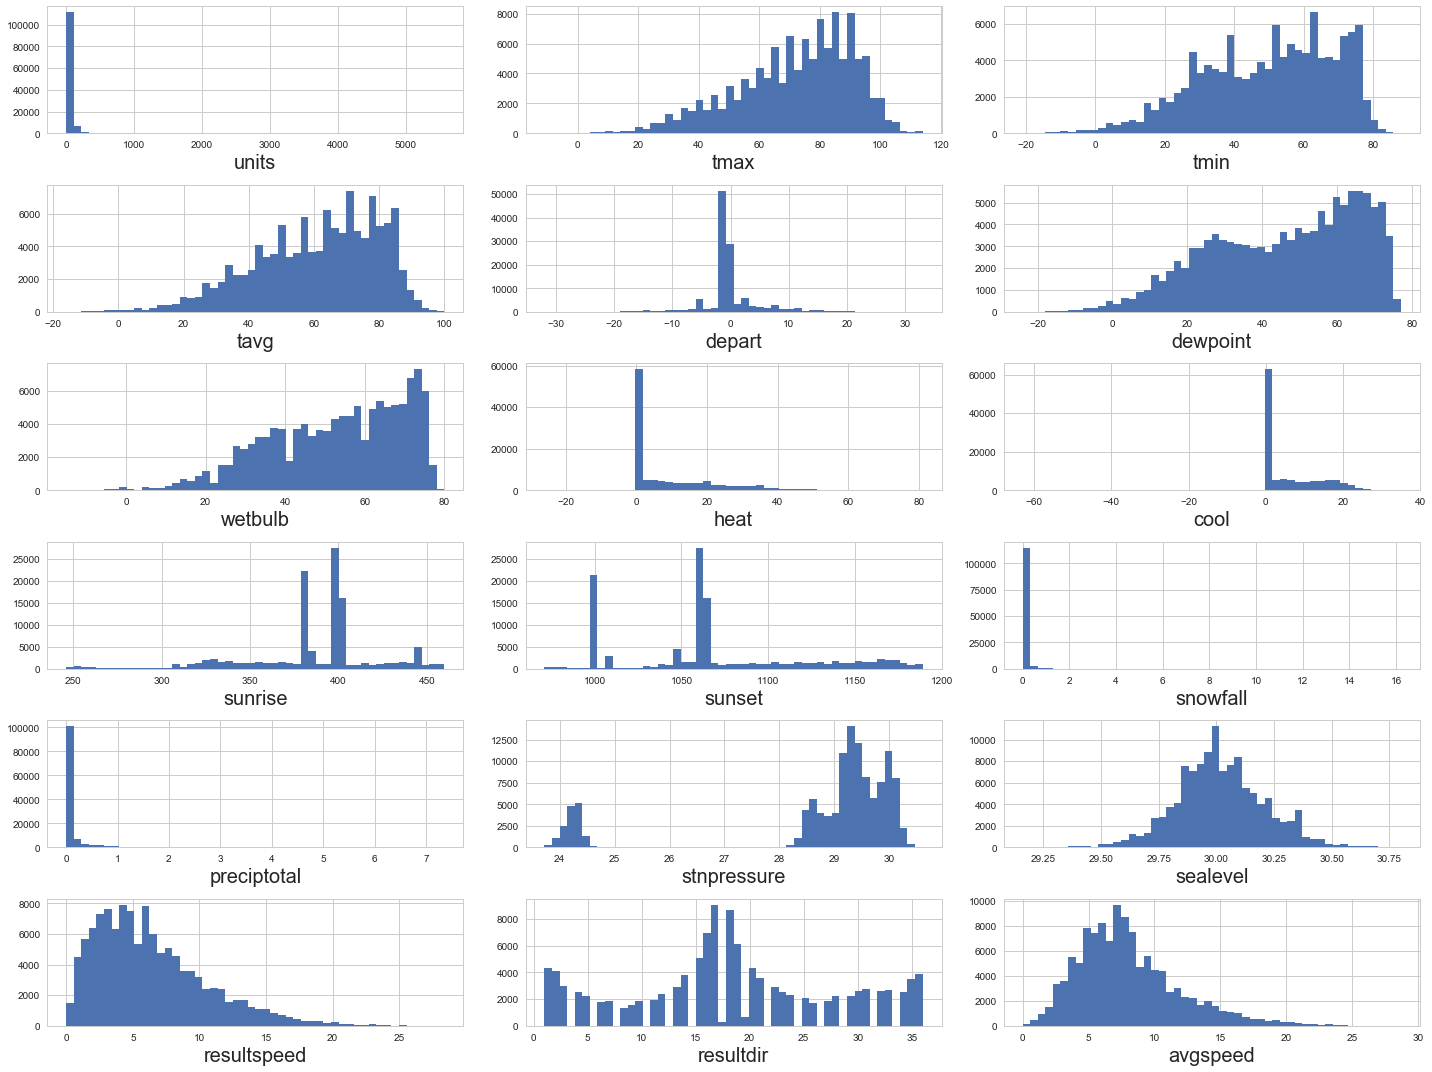

In [74]:
fig = plt.figure(figsize=(20, 15))
for i in range(0,18):
    plt.subplot(6, 3, i+1)
    plt.hist(dfX1[dfX1.columns[i]], bins=50)
    plt.xlabel(dfX1.columns[i], fontsize = 20)
plt.tight_layout()

In [34]:
dfX1_corr = dfX1.corr()

In [35]:
dfX1_corr

,units,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
units,1.000000,-0.019652,-0.032830,-0.026741,0.011198,-0.047400,-0.042805,0.036846,-0.003110,-0.009037,0.034065,-0.011805,-0.025165,-0.083976,-0.029867,0.072772,0.005459,0.097773
tmax,-0.019652,1.000000,0.913838,0.978230,0.212508,0.849209,0.933352,-0.928153,0.744292,-0.342278,0.337895,-0.099866,0.019985,0.142977,-0.335296,-0.056500,-0.161098,-0.069282
tmin,-0.032830,0.913838,1.000000,0.977886,0.207783,0.937042,0.977080,-0.907823,0.781856,-0.367372,0.367564,-0.043634,0.106075,0.262538,-0.328730,0.027736,-0.194290,-0.015089
tavg,-0.026741,0.978230,0.977886,1.000000,0.215145,0.912747,0.976267,-0.938567,0.780423,-0.362821,0.360676,-0.073467,0.064339,0.207109,-0.339311,-0.014875,-0.181753,-0.043347
depart,0.011198,0.212508,0.207783,0.215145,1.000000,0.210356,0.211756,-0.206688,0.154733,-0.042630,0.227538,-0.024260,-0.013048,0.077369,-0.221697,0.137736,-0.008967,0.157895
dewpoint,-0.047400,0.849209,0.937042,0.912747,0.210356,1.000000,0.970554,-0.860885,0.708997,-0.362096,0.347297,-0.024184,0.149708,0.365016,-0.279991,-0.038364,-0.225593,-0.097024
wetbulb,-0.042805,0.933352,0.977080,0.976267,0.211756,0.970554,1.000000,-0.924901,0.750021,-0.372302,0.357912,-0.054876,0.110262,0.300979,-0.312078,-0.021555,-0.206242,-0.070802
heat,0.036846,-0.928153,-0.907823,-0.938567,-0.206688,-0.860885,-0.924901,1.000000,-0.544089,0.309645,-0.304392,0.084256,-0.069216,-0.189507,0.324639,0.027342,0.178640,0.045854
cool,-0.003110,0.744292,0.781856,0.780423,0.154733,0.708997,0.750021,-0.544089,1.000000,-0.331951,0.333145,-0.026976,0.038429,0.168698,-0.243593,0.004832,-0.131800,-0.038511
sunrise,-0.009037,-0.342278,-0.367372,-0.362821,-0.042630,-0.362096,-0.372302,0.309645,-0.331951,1.000000,-0.543233,0.029708,-0.056902,-0.120931,0.173090,-0.010550,0.071534,0.024738


In [36]:
dfX1_corr['units'] > 0.05

# heat, sunset, resultspeed, avgspeed

units           True
tmax           False
tmin           False
tavg           False
depart         False
dewpoint       False
wetbulb        False
heat           False
cool           False
sunrise        False
sunset         False
snowfall       False
preciptotal    False
stnpressure    False
sealevel       False
resultspeed     True
resultdir      False
avgspeed        True
Name: units, dtype: bool

In [38]:
dfX1_corr['units'] < -0.05

#tmin, dewpoint, wetbulb, stnpressure 

units          False
tmax           False
tmin           False
tavg           False
depart         False
dewpoint       False
wetbulb        False
heat           False
cool           False
sunrise        False
sunset         False
snowfall       False
preciptotal    False
stnpressure     True
sealevel       False
resultspeed    False
resultdir      False
avgspeed       False
Name: units, dtype: bool

##### `units와 그나마 높은 상관관계를 보이는 resultspeed, avgspeed, stnpressure`

### 카테고리 독립변수 one-hot-encoding

In [39]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [40]:
df_test['is_holiday'] = df_test['is_holiday'].apply(is_holiday)

In [41]:
df_test[['codesum_YN', 'is_holiday']].head()

,codesum_YN,is_holiday
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1


## 1-1 : Correlation으로 거른 실수형 + 카테고리형 독립변수

In [42]:
df_test.columns

Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [43]:
features = ['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'dayofweek', 'is_holiday']
features = " ".join(features)
features = features.replace(" ", " + ")
features

'date + store_nbr + item_nbr + units + station_nbr + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + codesum + codesum_YN + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + dayofweek + is_holiday'

### 1-1-1

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr

In [44]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure  + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1056.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:18:05   Log-Likelihood:            -5.7738e+05
No. Observations:              118696   AIC:                         1.155e+06
Df Residuals:                  118538   BIC:                         1.157e+06
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.2638     16

### 1-1-2

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, codesum_YN

In [45]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + codesum_YN + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:18:12   Log-Likelihood:            -5.7737e+05
No. Observations:              118696   AIC:                         1.155e+06
Df Residuals:                  118537   BIC:                         1.157e+06
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.1979     16

### 1-1-3

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, is_holiday

In [46]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + is_holiday + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1090.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:18:19   Log-Likelihood:            -5.7604e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118537   BIC:                         1.154e+06
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.3355     16

### 1-1-4

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, is_holiday, codesum_YN

In [47]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + is_holiday+ codesum_YN + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:18:25   Log-Likelihood:            -5.7603e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118536   BIC:                         1.154e+06
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.1785     16

### 1-2 : VIF 로 거른 실수형 + 카테고리형 독립변수


#### VIF를 통한 실수형 독립변수 정리

In [48]:
df_for_vif = df_test[['tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed']]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns

In [50]:
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,35417.486004,tavg
1,11903.923240,tmax
2,6175.108526,tmin
3,2399.333228,sealevel
4,1334.164391,wetbulb
5,688.320913,sunset
6,411.083411,stnpressure
7,224.393386,dewpoint
8,167.844311,sunrise
9,53.516335,heat


In [51]:
del df_for_vif['tavg']

In [52]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,2370.882160,sealevel
1,1334.087865,wetbulb
2,688.260316,sunset
3,442.559581,tmax
4,411.081428,stnpressure
5,309.920195,tmin
6,224.384194,dewpoint
7,167.827869,sunrise
8,52.023845,heat
9,32.638106,avgspeed


In [53]:
del df_for_vif['sealevel']

In [54]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,1326.068095,wetbulb
1,383.761080,sunset
2,362.006840,tmax
3,326.663777,stnpressure
4,290.158894,tmin
5,220.438160,dewpoint
6,111.255460,sunrise
7,37.259819,heat
8,32.617385,avgspeed
9,20.081223,resultspeed


In [55]:
del df_for_vif['wetbulb']

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,382.603988,sunset
1,313.839434,stnpressure
2,238.475612,tmax
3,207.222183,tmin
4,111.251944,sunrise
5,67.809243,dewpoint
6,36.957926,heat
7,32.401063,avgspeed
8,19.948111,resultspeed
9,11.569109,cool


In [57]:
del df_for_vif['sunset']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,277.551302,stnpressure
1,177.159891,tmin
2,152.303895,tmax
3,106.978331,sunrise
4,67.720329,dewpoint
5,30.670518,avgspeed
6,23.058003,heat
7,19.349242,resultspeed
8,8.709922,cool
9,4.976487,resultdir


In [58]:
del df_for_vif['stnpressure']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,156.605362,tmin
1,108.370840,tmax
2,100.635995,sunrise
3,60.361254,dewpoint
4,28.150528,avgspeed
5,17.483190,resultspeed
6,10.031726,heat
7,5.548674,cool
8,4.940004,resultdir
9,1.333389,preciptotal


In [59]:
del df_for_vif['tmin']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,96.350376,tmax
1,92.755034,sunrise
2,31.879292,dewpoint
3,27.970913,avgspeed
4,17.397182,resultspeed
5,8.344183,heat
6,4.933384,resultdir
7,4.285132,cool
8,1.331286,preciptotal
9,1.190137,snowfall


In [60]:
del df_for_vif['tmax']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,38.244578,sunrise
1,27.696824,dewpoint
2,27.002598,avgspeed
3,16.938494,resultspeed
4,5.231035,heat
5,4.787815,resultdir
6,3.138467,cool
7,1.312844,preciptotal
8,1.185587,snowfall
9,1.085627,depart


In [61]:
del df_for_vif['sunrise']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,24.136326,avgspeed
1,16.153893,resultspeed
2,7.211213,dewpoint
3,4.455174,resultdir
4,2.714164,cool
5,2.257828,heat
6,1.283833,preciptotal
7,1.185154,snowfall
8,1.078537,depart


In [62]:
del df_for_vif['avgspeed']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,6.349992,dewpoint
1,4.272470,resultdir
2,3.249981,resultspeed
3,2.685667,cool
4,2.121090,heat
5,1.280202,preciptotal
6,1.184934,snowfall
7,1.073032,depart


dewpoint, resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart

depart, heat, cool, sunrise, snowfall, preciptotal,  resultspeed,  resultdir

### 1-2-1

- 실수형 : dewpoint, resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr

In [63]:
model_1 = sm.OLS.from_formula('units ~ dewpoint + resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1029.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:21:25   Log-Likelihood:            -5.7720e+05
No. Observations:              118696   AIC:                         1.155e+06
Df Residuals:                  118533   BIC:                         1.156e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        14.3356      2

### 1-2-2

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, is_holiday

In [64]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1069.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:21:34   Log-Likelihood:            -5.7585e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118533   BIC:                         1.154e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        12.8661      2

### 2-3

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, codesum_YN

In [65]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + codesum_YN + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1029.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:21:44   Log-Likelihood:            -5.7719e+05
No. Observations:              118696   AIC:                         1.155e+06
Df Residuals:                  118533   BIC:                         1.156e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        15.5897      2

### 2-4

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, codesum_YN, is_holiday

In [66]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + codesum_YN + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1062.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:21:55   Log-Likelihood:            -5.7585e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118532   BIC:                         1.154e+06
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        12.6764      2

# 최종 결정

### 1-2-2

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, is_holiday

In [77]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1069.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:48:38   Log-Likelihood:            -5.7585e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118533   BIC:                         1.154e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        12.8661      2

# Scaling 적용

In [78]:
model_s = sm.OLS.from_formula('units ~ scale(resultdir) + scale(resultspeed) + scale(cool) + scale(heat) + scale(preciptotal) + scale(snowfall) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_s = model_s.fit()
print(result_s.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1069.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:            -5.7585e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118533   BIC:                         1.154e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        14.9997      2

In [79]:
model_s = sm.OLS.from_formula('units ~ scale(resultspeed) + scale(cool) + scale(heat) + scale(preciptotal) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_s = model_s.fit()
print(result_s.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1082.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:59:12   Log-Likelihood:            -5.7585e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118535   BIC:                         1.154e+06
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        15.0058      2

# Outlier 제거

In [ ]:
# 1차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 2차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 3차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 4차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())